Hello, I just recently started...

If you like my short works, please give me a vote. I would be very grateful.

And if it is not too much trouble, look at [my three works](https://www.kaggle.com/competitions/connectx/code), each of which is [1 line of code](https://www.kaggle.com/code/nina2025/agent-3x3-one-line-of-code-vs-negamax). Thank you.

Further actions will be carried out in accordance with the [following plan](https://www.kaggle.com/code/analyticaobscura/optimal-fertilizers-eda-playground-0-36918/comments)

### action.1 ( 3 + 0 )

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def load():
    path = '/kaggle/input/10-june-2025-fertilizer-1-10-3-0/'
    
    df1 = pd.read_csv(path + 'submission__LB_0_36826__v02__Mikhail_Naumov' + '.csv')
    df2 = pd.read_csv(path + 'submission__LB_0_36826__v07__Mahdi_Ravaghi'  + '.csv')
    df3 = pd.read_csv(path + 'submission__LB_0_36918__v01__Ozan M'         + '.csv')
    
    df1 = df1.rename(columns={'Fertilizer Name' : 'FN__M.Naumov'})
    df2 = df2.rename(columns={'Fertilizer Name' : 'FN__M.Ravaghi'})
    df3 = df3.rename(columns={'Fertilizer Name' : 'FN__Ozan M'})
    
    eq = [None for i in range(250_000)]
    
    df1['eq1'],df2['eq2'],df3['eq3'] = eq,eq,eq
    
    dfs = pd.merge(df1,df2,on="id")
    dfs = pd.merge(dfs,df3,on="id")
    
    return dfs

In [2]:
def f_equs1a(x):
    if x['FN__M.Naumov']  == x['FN__M.Ravaghi'] and\
       x['FN__M.Naumov']  == x['FN__Ozan M']: 
        return None
    return 'equ'
def f_equs2a(x):
    if x['FN__M.Ravaghi'] == x['FN__M.Naumov']  and\
       x['FN__M.Ravaghi'] == x['FN__Ozan M']: 
        return None
    return 'equ'
def f_equs3a(x):
    if x['FN__Ozan M']    == x['FN__M.Naumov']  and\
       x['FN__Ozan M']    == x['FN__M.Ravaghi']: 
        return None
    return 'equ'
    

def f_equs1b(x):
    if x['FN__M.Naumov']  != x['FN__M.Ravaghi'] and\
       x['FN__M.Naumov']  != x['FN__Ozan M']    and\
       x['FN__M.Ravaghi'] == x['FN__Ozan M']:
        return None
    return 'equ'
def f_equs2b(x):
    if x['FN__M.Ravaghi'] != x['FN__M.Naumov']  and\
       x['FN__M.Ravaghi'] != x['FN__Ozan M']    and\
       x['FN__M.Naumov']  == x['FN__Ozan M']: 
        return None
    return 'equ'
def f_equs3b(x):
    if x['FN__Ozan M']    != x['FN__M.Naumov']  and\
       x['FN__Ozan M']    != x['FN__M.Ravaghi'] and\
       x['FN__M.Naumov']  == x['FN__M.Ravaghi']: 
        return None
    return 'equ'

In [3]:
dfs1 = load()
dfs2 = load()

display(dfs1[200_003:200_007])

,id,FN__M.Naumov,eq1,FN__M.Ravaghi,eq2,FN__Ozan M,eq3
200003,950003,28-28 DAP 20-20,None,DAP 28-28 20-20,None,DAP 28-28 20-20,None
200004,950004,DAP 10-26-26 28-28,None,28-28 DAP 20-20,None,28-28 DAP 10-26-26,None
200005,950005,10-26-26 Urea 17-17-17,None,10-26-26 17-17-17 Urea,None,10-26-26 17-17-17 Urea,None
200006,950006,Urea 14-35-14 10-26-26,None,Urea 14-35-14 17-17-17,None,Urea 14-35-14 10-26-26,None


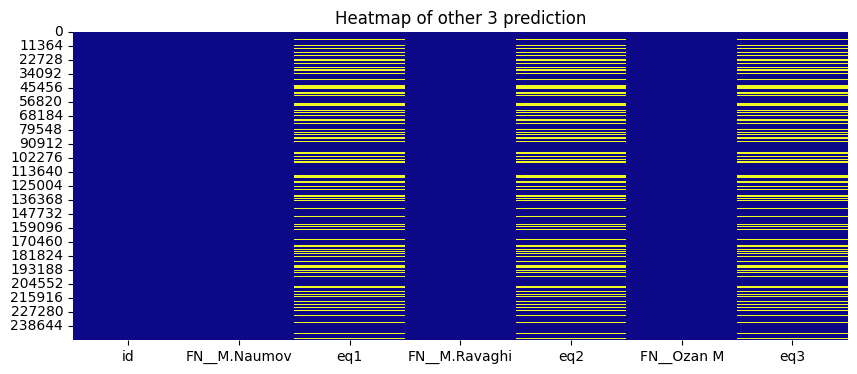

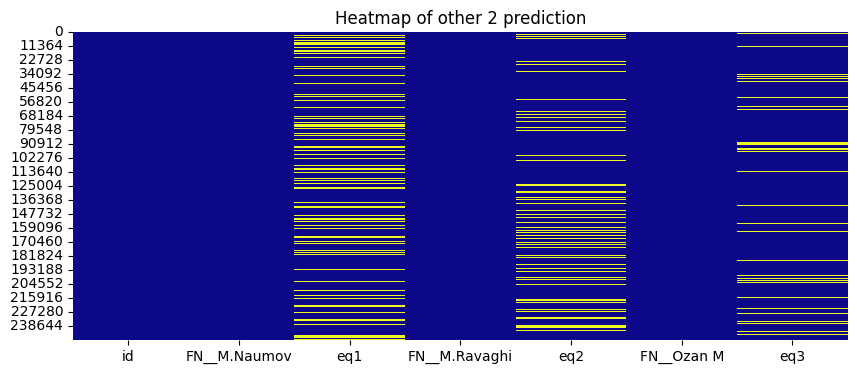

In [4]:
dfs1['eq1'] = dfs1.apply(lambda x: f_equs1a(x), axis=1)
dfs1['eq2'] = dfs1.apply(lambda x: f_equs2a(x), axis=1)
dfs1['eq3'] = dfs1.apply(lambda x: f_equs3a(x), axis=1)

plt.figure(figsize=(10, 4))
sns.heatmap(dfs1.isnull(), cbar=False, cmap="plasma")
plt.title("Heatmap of other 3 prediction")
plt.show()

print('\n\n')

dfs2['eq1'] = dfs2.apply(lambda x: f_equs1b(x), axis=1)
dfs2['eq2'] = dfs2.apply(lambda x: f_equs2b(x), axis=1)
dfs2['eq3'] = dfs2.apply(lambda x: f_equs3b(x), axis=1)

plt.figure(figsize=(10, 4))
sns.heatmap(dfs2.isnull(), cbar=False, cmap="plasma")
plt.title("Heatmap of other 2 prediction")
plt.show()

In [5]:
path = '/kaggle/input/10-june-2025-fertilizer-1-10-3-0/'

df = pd.read_csv(path + 'submission__LB_0_36918__v01__Ozan M___Added.csv') # LB = ?

df.to_csv('submission.csv', index=False)

df

,id,Fertilizer Name
0,750000,10-26-26 20-20 DAP
1,750001,17-17-17 10-26-26 20-20
2,750002,20-20 28-28 Urea
3,750003,14-35-14 DAP 17-17-17
4,750004,20-20 Urea 10-26-26
...,...,...
249995,999995,Urea 28-28 17-17-17
249996,999996,10-26-26 17-17-17 28-28
249997,999997,DAP 10-26-26 Urea
249998,999998,10-26-26 28-28 17-17-17


`
using System;
using System.Collections.Generic;
using System.ComponentModel;
using System.Data;
using System.Drawing;
using System.Linq;
using System.Text;
using System.Threading.Tasks;
using System.Windows.Forms;
using System.IO;

namespace Ens_multi
{
    public partial class Form1 : Form
    {
        List<df> dfs = new List<df>();

        List<df> zela = new List<df>();

        List<string> LoadedFiles = new List<string>();
        public Form1()
        {
            InitializeComponent();
        }

        private void Form1_Load(object sender, EventArgs e)
        {

        }
        private void File_Load__tsmi_Click(object sender, EventArgs e)
        {
            if (this.openFileDialog1.ShowDialog() == DialogResult.OK)
            {
                this.LoadedFiles = this.openFileDialog1.FileNames.ToList();

                this.checkedListBox1.Items.Clear();

                this.dfs = new List<df>();

                foreach (string file in this.LoadedFiles)
                {
                    this.dfs.Add(new df(file));
                }

                foreach(df df in this.dfs)
                {
                    this.checkedListBox1.Items.Add(df.Short_FiN);
                }

                // MessageBox.Show(this.dfs.Count.ToString() + " files '*df.csv',  was loaded");
            }
        }

        private void Compare__tsmi_Click(object sender, EventArgs e)
        {
            this.zela.Clear();

            foreach (System.String checked_file in this.checkedListBox1.CheckedItems)
            {
                for (int i = 0; i < this.dfs.Count; i++)
                {
                    if (checked_file == dfs[i].Short_FiN)
                    {
                        this.zela.Add(dfs[i]);
                    }
                }
            }

            if (zela.Count == 3)
            {
                int qn01 = 0;
                int qn02 = 0;
                int qn12 = 0;
                int qrl2 = 0;

                for (int i = 0; i < zela[0].Rosy.Count; i++)
                {
                    rdf r0 = zela[0].Rosy[i];
                    rdf r1 = zela[1].Rosy[i];
                    rdf r2 = zela[2].Rosy[i];

                    if (rosy_not_equal(r0, r1))
                        qn01++;
                    if (rosy_not_equal(r0, r2)) 
                        qn02++;
                    if (rosy_not_equal(r1, r2))
                        qn12++;

                    string rez_sravn = Equal_any_two(r0, r1, r2);

                    if (rez_sravn != "-1")
                        qrl2++;
                }

                MessageBox.Show(
                    qn01.ToString() + '\n' +
                    qn02.ToString() + '\n' +
                    qn12.ToString() + '\n' +
                    qrl2.ToString()
                    );
            }
        }

        private string Equal_any_two(rdf r0, rdf r1, rdf r2)
        {
            if (r0.pols == r1.pols) return "01";
            if (r0.pols == r2.pols) return "02";
            if (r1.pols == r2.pols) return "12";
            return (-1).ToString();
        }

        private bool rosy_not_equal(rdf r0, rdf r1)
        {
            if (r0.pols != r1.pols) return true;
            return false;
        }
        private bool rosy_not_equal(rdf r0, rdf r1, rdf r2)
        {
            if (r0.pols != r1.pols) return true;
            if (r0.pols != r2.pols) return true;
            if (r1.pols != r2.pols) return true;
            return false;
        }

        private void File__tsmi_Click(object sender, EventArgs e) {}

        private void Save__tsmi_Click(object sender, EventArgs e)
        {
            int idx_add = checkedListBox1.SelectedIndex;

            this.zela.Clear();

            foreach (System.String checked_file in this.checkedListBox1.CheckedItems)
            {
                for (int i = 0; i < this.dfs.Count; i++)
                {
                    if (checked_file == dfs[i].Short_FiN)
                    {
                        this.zela.Add(dfs[i]);
                    }
                }
            }

            if (zela.Count == 3)
            {
                List<string> list_rows_new_df
                    = new List<string>() { zela[0].Caption };

                for (int i = 0; i < zela[0].Rosy.Count; i++)
                {
                    rdf r0 = zela[0].Rosy[i];
                    rdf r1 = zela[1].Rosy[i];
                    rdf r2 = zela[2].Rosy[i];
                    rdf rZ = zela[idx_add].Rosy[i];
                    string Id = r0.Id + ",";
                    string rez_equal = Equal_any_two(r0, r1, r2);
                    switch (rez_equal)
                    {
                        case "01": list_rows_new_df.Add(Id + r1.pols); break;
                        case "02": list_rows_new_df.Add(Id + r2.pols); break;
                        case "12": list_rows_new_df.Add(Id + r1.pols); break;
                        case "-1": list_rows_new_df.Add(Id + rZ.pols); break;
                    }
                }

                if (saveFileDialog1.ShowDialog() == DialogResult.OK)
                {
                    string Fin_new_Df = saveFileDialog1.FileName;
                    if (!Fin_new_Df.Contains(".csv")) Fin_new_Df += ".csv";
                    File.WriteAllLines(Fin_new_Df, list_rows_new_df);
                    MessageBox.Show("New lines sent to file:" + Fin_new_Df);
                }
            }
        }
    }

    class df
    {
        string FiN;
        public string Short_FiN;
        public List<rdf> Rosy = new List<rdf>();
        bool isloaded;
        public string Caption;
        public df(string fiN)
        {
            this.FiN = fiN;
            if (File.Exists(fiN))
            {
                FileInfo file = new FileInfo(fiN);

                this.Short_FiN = file.Name;

                string[] FiN_Rows = File.ReadAllLines(fiN);

                this.Caption = FiN_Rows[0];

                for(int i = 1; i < FiN_Rows.Length; i++)
                {
                    Rosy.Add(new rdf(FiN_Rows[i]));
                }
                this.isloaded = true;
            }
            else { 
                this.isloaded = false; 
            }
        }
    }

    class rdf
    {
        public string Id;
        public string[] values;
        public string pols;

        public rdf(string row_df)
        {
            string[] ara = row_df.Split(',');
            this.pols = ara[1];
            this.values = ara[1].Split(' ');
            this.Id = ara[0];
        }
    }
}

`